# Webscraping Tutorial

Things needed:  
https://www.anaconda.com/download

python packages:  
- bs4 (BeautifulSoup)
- pandas
- matplotlib

### Basic idea

- Webpage or web API has some piece of data that we want to collect
- No dataset out there for it, or something for which we need live data
- ex: Maybe you want to log weather in your area over time

### Principle

- When navigating in a browser: make a request, get back text response, render said text response
- Instead, we make a request, get back text response, and parse/analyze response to get the data we need

### Ethics

- Webscraping is an extremely gray area
- Courteous webscraping
    - Don't needlessly burden server (don't scrape multiple pages faster than necessary)
    - Obey robots.txt

# Example problem 1:

Finding the top artists on soundcloud

First, check https://soundcloud.com/robots.txt:

```
User-agent: *
Disallow:
Sitemap: https://a-v2.sndcdn.com/sitemap.txt
```

Empty disallow means scraping any page is allowed

In [1]:
from bs4 import BeautifulSoup
import urllib.request

'<!DOCTYPE html>\n\n<html lang="en">\n<head>\n  <meta charset="utf-8">\n  \n  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n  \n  <link rel="dns-prefetch" href="//style.sndcdn.com">\n  <link rel="dns-prefetch" href="//a-v2.sndcdn.com">\n  <link rel="dns-prefetch" href="//api-v2.soundcloud.com">\n  <link rel="dns-prefetch" href="//sb.scorecardresearch.com">\n  <link rel="dns-prefetch" href="//secure.quantserve.com">\n  <link rel="dns-prefetch" href="//eventlogger.soundcloud.com">\n  <link rel="dns-prefetch" href="//api.soundcloud.com">\n  <link rel="dns-prefetch" href="//ssl.google-analytics.com">\n  <link rel="dns-prefetch" href="//i1.sndcdn.com">\n  <link rel="dns-prefetch" href="//i2.sndcdn.com">\n  <link rel="dns-prefetch" href="//i3.sndcdn.com">\n  <link rel="dns-prefetch" href="//i4.sndcdn.com">\n  <link rel="dns-prefetch" href="//wis.sndcdn.com">\n  <link rel="dns-prefetch" href="//va.sndcdn.com">\n  <link rel="dns-prefetch" href="//pixel.quantserve.com">\n\n 
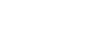
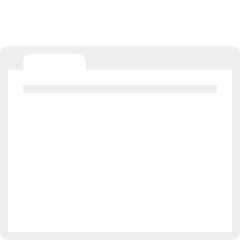

In [2]:
url = "https://soundcloud.com/charts/top"

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
page = response.read().decode('utf-8')
page

### Beautiful Soup Basics

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [3]:
soup = BeautifulSoup(page)
soup.head

<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//style.sndcdn.com" rel="dns-prefetch"/>
<link href="//a-v2.sndcdn.com" rel="dns-prefetch"/>
<link href="//api-v2.soundcloud.com" rel="dns-prefetch"/>
<link href="//sb.scorecardresearch.com" rel="dns-prefetch"/>
<link href="//secure.quantserve.com" rel="dns-prefetch"/>
<link href="//eventlogger.soundcloud.com" rel="dns-prefetch"/>
<link href="//api.soundcloud.com" rel="dns-prefetch"/>
<link href="//ssl.google-analytics.com" rel="dns-prefetch"/>
<link href="//i1.sndcdn.com" rel="dns-prefetch"/>
<link href="//i2.sndcdn.com" rel="dns-prefetch"/>
<link href="//i3.sndcdn.com" rel="dns-prefetch"/>
<link href="//i4.sndcdn.com" rel="dns-prefetch"/>
<link href="//wis.sndcdn.com" rel="dns-prefetch"/>
<link href="//va.sndcdn.com" rel="dns-prefetch"/>
<link href="//pixel.quantserve.com" rel="dns-prefetch"/>
<title>The most played tracks on SoundCloud this week</title>
<meta content="record, s

<body>
<div id="app">
<style type="text/css">.header{width:100%;height:46px}.header,.header__logo{background:#333}.header__logoLink{background:url() no-repeat 12px 11px;background-size:48px 22px;display:block;height:46px;width:69px}.header__logoLink:focus{background-color:rgba(255,72,0,.8);outline:0}#header__loading{margin:13px auto 0;width:16px}@media (-webkit-min-device-pixel-ratio:2),(min-resolution:192dpi),(min-resolution:2dppx){.header__logoLink{background-image:url()}}</style>
<div class="header sc-selection-disabled show fixed g-dark g-z-index-header" role="banner">
<div class="header__inner l-container l-fullwidth">
<div class="header__left left">
<div class="header__logo left">
<a class="header__logoLink sc-border-box sc-ir" href="/" title="Home">SoundCloud</a>
</div>
</div>
<div class="sc-hidden" id="header__loading">
<img class="hide" height="16" id="loading__img" src="https://a-v2.sndcdn.com/assets/images/loader-dark-45940ae3.gif" width="16"/>
</div>
</div>
</div>
<script t
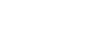
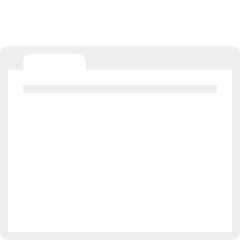

In [4]:
soup.body

<div id="app">
<style type="text/css">.header{width:100%;height:46px}.header,.header__logo{background:#333}.header__logoLink{background:url() no-repeat 12px 11px;background-size:48px 22px;display:block;height:46px;width:69px}.header__logoLink:focus{background-color:rgba(255,72,0,.8);outline:0}#header__loading{margin:13px auto 0;width:16px}@media (-webkit-min-device-pixel-ratio:2),(min-resolution:192dpi),(min-resolution:2dppx){.header__logoLink{background-image:url()}}</style>
<div class="header sc-selection-disabled show fixed g-dark g-z-index-header" role="banner">
<div class="header__inner l-container l-fullwidth">
<div class="header__left left">
<div class="header__logo left">
<a class="header__logoLink sc-border-box sc-ir" href="/" title="Home">SoundCloud</a>
</div>
</div>
<div class="sc-hidden" id="header__loading">
<img class="hide" height="16" id="loading__img" src="https://a-v2.sndcdn.com/assets/images/loader-dark-45940ae3.gif" width="16"/>
</div>
</div>
</div>
<script type="te
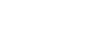
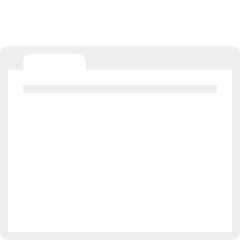

In [5]:
soup.body.div

<div id="app">
<style type="text/css">.header{width:100%;height:46px}.header,.header__logo{background:#333}.header__logoLink{background:url() no-repeat 12px 11px;background-size:48px 22px;display:block;height:46px;width:69px}.header__logoLink:focus{background-color:rgba(255,72,0,.8);outline:0}#header__loading{margin:13px auto 0;width:16px}@media (-webkit-min-device-pixel-ratio:2),(min-resolution:192dpi),(min-resolution:2dppx){.header__logoLink{background-image:url()}}</style>
<div class="header sc-selection-disabled show fixed g-dark g-z-index-header" role="banner">
<div class="header__inner l-container l-fullwidth">
<div class="header__left left">
<div class="header__logo left">
<a class="header__logoLink sc-border-box sc-ir" href="/" title="Home">SoundCloud</a>
</div>
</div>
<div class="sc-hidden" id="header__loading">
<img class="hide" height="16" id="loading__img" src="https://a-v2.sndcdn.com/assets/images/loader-dark-45940ae3.gif" width="16"/>
</div>
</div>
</div>
<script type="te
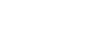
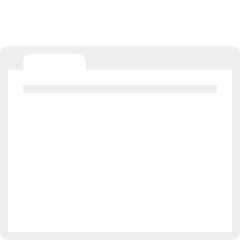

In [6]:
soup.body.find(id="app")

In [7]:
soup.find_all("a")

[<a class="header__logoLink sc-border-box sc-ir" href="/" title="Home">SoundCloud</a>,
 <a class="sc-button sc-button-medium" href="http://www.enable-javascript.com/" target="_blank">Show me how to enable it</a>,
 <a href="/charts/top?genre=all-music">Top 50</a>,
 <a href="/charts/new?genre=all-music">New &amp; hot</a>,
 <a href="/charts/top?genre=all-music">All music genres</a>,
 <a href="/charts/top?genre=all-audio">All audio genres</a>,
 <a href="/charts/top?genre=alternativerock">Alternative Rock</a>,
 <a href="/charts/top?genre=ambient">Ambient</a>,
 <a href="/charts/top?genre=classical">Classical</a>,
 <a href="/charts/top?genre=country">Country</a>,
 <a href="/charts/top?genre=danceedm">Dance &amp; EDM</a>,
 <a href="/charts/top?genre=dancehall">Dancehall</a>,
 <a href="/charts/top?genre=deephouse">Deep House</a>,
 <a href="/charts/top?genre=disco">Disco</a>,
 <a href="/charts/top?genre=drumbass">Drum &amp; Bass</a>,
 <a href="/charts/top?genre=dubstep">Dubstep</a>,
 <a href="/c

At this point, helpful to view page code in a browser's dev console to get an idea of what we're looking for:  
https://soundcloud.com/charts/top

(make sure to disable javascript)

In [8]:
tracks_container = soup.find_all(class_="sounds")[0]
song_artist_combos = tracks_container.find_all("h2")[1:]
song_artist_combos

[<h2 itemprop="name"><a href="/lil-baby-4pf/drip-too-hard" itemprop="url">Drip Too Hard</a>
 by <a href="/lil-baby-4pf">Lil Baby</a></h2>,
 <h2 itemprop="name"><a href="/lil_peep/lil-peep-ft-xxxtentacion-falling-down" itemprop="url">Lil Peep &amp; XXXTENTACION - Falling Down</a>
 by <a href="/lil_peep">☆LiL PEEP☆</a></h2>,
 <h2 itemprop="name"><a href="/liluzivert/new-patek" itemprop="url">New Patek</a>
 by <a href="/liluzivert">LIL UZI VERT</a></h2>,
 <h2 itemprop="name"><a href="/scumgang6ix9ine/fefe-feat-nicki-minaj" itemprop="url">FEFE (Feat. Nicki Minaj &amp; Murda Beatz)</a>
 by <a href="/scumgang6ix9ine">6IX9INE</a></h2>,
 <h2 itemprop="name"><a href="/kanyewest/i-love-it-kanye-west-lil-pump" itemprop="url">Kanye West &amp; Lil Pump - I Love It</a>
 by <a href="/kanyewest">Kanye West</a></h2>,
 <h2 itemprop="name"><a href="/lil-baby-4pf/close-friends" itemprop="url">Close Friends</a>
 by <a href="/lil-baby-4pf">Lil Baby</a></h2>,
 <h2 itemprop="name"><a href="/jahseh-onfroy/hope

In [26]:
song_data = []
for entry in song_artist_combos:
    song_elements = entry.find_all("a")
    name = song_elements[0].string
    artist = song_elements[1].string
    song_data.append({"song":name, "artist":artist})
    print("{0} :: {1}".format(name, artist))

Drip Too Hard :: Lil Baby
Lil Peep & XXXTENTACION - Falling Down :: ☆LiL PEEP☆
New Patek :: LIL UZI VERT
FEFE (Feat. Nicki Minaj & Murda Beatz) :: 6IX9INE
Kanye West & Lil Pump - I Love It :: Kanye West
Close Friends :: Lil Baby
HOPE :: XXXTENTACION
Leave Me Alone (Prod. by Young Forever x Cast Beats) :: Flipp Dinero
YNW MELLY - MURDER ON MY MIND Prod By; SMKEXCLSV :: Ynw Melly
Taste (feat. Offset) :: Tyga
STOOPID (Feat. Bobby Shmurda) :: 6IX9INE
lil peep - star shopping (prod. kryptik) :: Jack
Trip :: Ella Mai
I Kill People! ft Tadoe & Chief Keef [Produced by: Ozmusiqe] RR :: Trippie Redd
Lean Wit Me :: Juice WRLD
Noticed :: Lil Mosey
juice wrld - legends :( :: Juice WRLD
BEBE (ft. Anuel AA) :: 6IX9INE
Marshmello & Amr Diab- Bayen Habeit "In Love" عمرو دياب Marshmello - باين حبيت :: marshmello
I don't wanna do this anymore :: XXXTENTACION
Walk :: COMETHAZINE
Eminem - KILLSHOT (Machine Gun Kelly MGK DISS) rap devil response :: WorldStarHipHop Radio
Wasted (feat. Lil Uzi Vert) :: Juice

In order to do actual analysis on our data, we can use pandas, a well known dataframe library for python. (Usage is similar to R's default dataframes.)

https://pandas.pydata.org/pandas-docs/stable/

In [37]:
import pandas as pd
%matplotlib notebook

In [27]:
df = pd.DataFrame(song_data)
df

,artist,song
0,Lil Baby,Drip Too Hard
1,☆LiL PEEP☆,Lil Peep & XXXTENTACION - Falling Down
2,LIL UZI VERT,New Patek
3,6IX9INE,FEFE (Feat. Nicki Minaj & Murda Beatz)
4,Kanye West,Kanye West & Lil Pump - I Love It
5,Lil Baby,Close Friends
6,XXXTENTACION,HOPE
7,Flipp Dinero,Leave Me Alone (Prod. by Young Forever x Cast ...
8,Ynw Melly,YNW MELLY - MURDER ON MY MIND Prod By; SMKEXCLSV
9,Tyga,Taste (feat. Offset)


With pandas, you can query dataframes and supply expressions that return a series of booleans, to get only rows where true:

In [12]:
df[df.artist == "XXXTENTACION"]

,artist,song
6,XXXTENTACION,HOPE
19,XXXTENTACION,I don't wanna do this anymore


In [13]:
df[df.artist.str.contains("lil", False)]

,artist,song
0,Lil Baby,Drip Too Hard
1,☆LiL PEEP☆,Lil Peep & XXXTENTACION - Falling Down
2,LIL UZI VERT,New Patek
5,Lil Baby,Close Friends
15,Lil Mosey,Noticed
33,Lil Tjay,Lil TJAY - Brothers Prod by [JDONTHATRACK] & [...
39,lil skies,Creeping (feat. Rich The Kid)[prod. by Menoh B...


There are some artists (currently) who show up more than once, so let's make a bar chart for the people who have more than one song

In [14]:
df.artist.value_counts()

Juice WRLD                    4
6IX9INE                       4
Ynw Melly                     2
Trippie Redd                 2
XXXTENTACION                  2
Lil Baby                      2
YG                            1
No Jumper                     1
LIL UZI VERT                  1
Tyga                          1
Famous Dex                    1
ㅤㅤㅤ                           1
ROJAS                         1
Jack                          1
Lil Tjay                      1
Kanye West                    1
☆LiL PEEP☆                    1
YoungBoy Never Broke Again    1
Flipp Dinero                  1
Gucci Mane                    1
Ella Mai                      1
Rich The Kid                  1
smokepurpp                    1
Lil Mosey                     1
Adham Seliman                 1
Post Malone                   1
marshmello                    1
eslam mostafa                 1
SHORELINE MAFIA               1
THAT PLUG                     1
Adam Amin                     1
cubied  

In [28]:
df.artist.value_counts()[df.artist.value_counts() > 1]

Juice WRLD       4
6IX9INE          4
Ynw Melly        2
Trippie Redd    2
XXXTENTACION     2
Lil Baby         2
Name: artist, dtype: int64

<IPython.core.display.Javascript object>


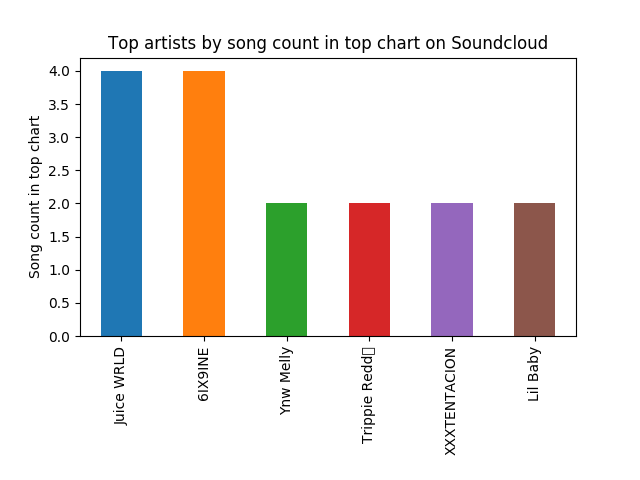

In [38]:
axes = df.artist.value_counts()[df.artist.value_counts() > 1].plot(kind="bar")
axes.set_title("Top artists by song count in top chart on Soundcloud")
axes.set_ylabel("Song count in top chart")
axes.figure.subplots_adjust(bottom=.3)

# Example Problem 2

Scraping an API endpoint

http://api.open-notify.org/iss-now.json

In [17]:
import json

In [18]:
response = urllib.request.urlopen("http://api.open-notify.org/iss-now.json")
result = json.loads(response.read())
result

{'message': 'success',
 'iss_position': {'longitude': '-166.1303', 'latitude': '-31.1715'},
 'timestamp': 1539112018}

In [19]:
import time

def scrapeISSAPI():
    response = urllib.request.urlopen("http://api.open-notify.org/iss-now.json")
    result = json.loads(response.read())
    return result
    
scrapes = 20
data = []
for i in range (0, scrapes):
    print("Scrape {0}".format(i))
    result = scrapeISSAPI()
    data.append({
        "time":result["timestamp"],
        "lat":result["iss_position"]["latitude"],
        "lon":result["iss_position"]["longitude"]
    })
    time.sleep(1)
data

Scrape 0
Scrape 1
Scrape 2
Scrape 3
Scrape 4
Scrape 5
Scrape 6
Scrape 7
Scrape 8
Scrape 9
Scrape 10
Scrape 11
Scrape 12
Scrape 13
Scrape 14
Scrape 15
Scrape 16
Scrape 17
Scrape 18
Scrape 19


[{'time': 1539112018, 'lat': '-31.1715', 'lon': '-166.1303'},
 {'time': 1539112019, 'lat': '-31.1268', 'lon': '-166.0795'},
 {'time': 1539112020, 'lat': '-31.0821', 'lon': '-166.0288'},
 {'time': 1539112021, 'lat': '-31.0151', 'lon': '-165.9528'},
 {'time': 1539112022, 'lat': '-30.9703', 'lon': '-165.9023'},
 {'time': 1539112023, 'lat': '-30.9255', 'lon': '-165.8517'},
 {'time': 1539112025, 'lat': '-30.8584', 'lon': '-165.7760'},
 {'time': 1539112026, 'lat': '-30.8135', 'lon': '-165.7256'},
 {'time': 1539112027, 'lat': '-30.7687', 'lon': '-165.6753'},
 {'time': 1539112028, 'lat': '-30.7013', 'lon': '-165.5998'},
 {'time': 1539112029, 'lat': '-30.6564', 'lon': '-165.5496'},
 {'time': 1539112030, 'lat': '-30.6115', 'lon': '-165.4994'},
 {'time': 1539112031, 'lat': '-30.5665', 'lon': '-165.4493'},
 {'time': 1539112033, 'lat': '-30.4991', 'lon': '-165.3742'},
 {'time': 1539112034, 'lat': '-30.4541', 'lon': '-165.3242'},
 {'time': 1539112035, 'lat': '-30.4091', 'lon': '-165.2743'},
 {'time'

In [40]:
df2 = pd.DataFrame(data)
df2

,lat,lon,time
0,-31.1715,-166.1303,1539112018
1,-31.1268,-166.0795,1539112019
2,-31.0821,-166.0288,1539112020
3,-31.0151,-165.9528,1539112021
4,-30.9703,-165.9023,1539112022
5,-30.9255,-165.8517,1539112023
6,-30.8584,-165.7760,1539112025
7,-30.8135,-165.7256,1539112026
8,-30.7687,-165.6753,1539112027
9,-30.7013,-165.5998,1539112028


# Example Problem 3

Get a list of random floats from random.org

https://www.random.org/gaussian-distributions/?num=100&mean=0.0&stdev=1.0&dec=10&col=1&notation=scientific&format=html&rnd=new


In [21]:
import matplotlib.pyplot as plt

In [22]:
number_of_numbers = 500

url = "https://www.random.org/gaussian-distributions/?num="+str(number_of_numbers)+"&mean=0.0&stdev=1.0&dec=10&col=1&notation=scientific&format=html&rnd=new"
response = urllib.request.urlopen(url)
page = response.read().decode('utf-8')

In [23]:
soup = BeautifulSoup(page)
numbers = soup.find_all(class_="data")[0].string.split('\n')

converted_numbers = [float(number) if number != "" else 0.0 for number in numbers]
converted_numbers

[1.218240264,
 2.461399697,
 0.7422170861,
 -1.299116447,
 -0.006033619473,
 -1.474715327,
 -0.7492751073,
 0.7928844395,
 0.5976607656,
 -0.6854812539,
 0.4247163598,
 0.2417491604,
 -0.9196121581,
 2.015152911,
 -0.004049542324,
 1.392071417,
 0.04649738343,
 0.4957469119,
 -0.6161672907,
 -1.307099629,
 0.07978514048,
 1.626365798,
 1.530292698,
 -0.5172332493,
 0.3578752593,
 -0.7462642203,
 -0.841127633,
 0.6438712728,
 0.1657211489,
 -1.62512438,
 1.068182131,
 -0.659512925,
 1.215340643,
 0.6400805345,
 0.3178326534,
 0.8569131581,
 -0.9544909354,
 0.2273217724,
 -0.4351269667,
 -0.4198097647,
 -0.3670777134,
 -0.2020896042,
 -1.269760282,
 -0.0823366121,
 -0.8355613365,
 -0.3653447542,
 -1.831172433,
 0.3225666684,
 1.560116064,
 1.358820006,
 -1.45122684,
 1.005196966,
 -0.8146777436,
 -0.9031597248,
 0.6938761447,
 -0.3968929878,
 -0.5360653079,
 0.6837489484,
 -0.7135481262,
 1.019390975,
 1.008484918,
 -1.303968237,
 -1.086672,
 -0.445322692,
 0.4525703171,
 0.8084552977,
 

<IPython.core.display.Javascript object>


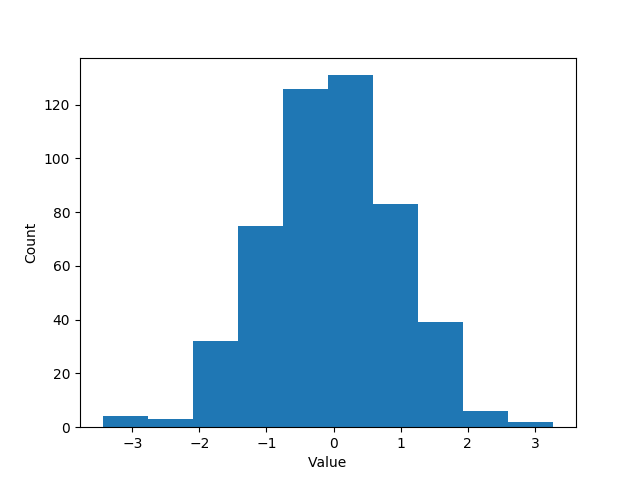

Text(0.5, 0, 'Value')

In [39]:
fig1, axes1 = plt.subplots()
axes1.hist(converted_numbers)
axes1.set_ylabel("Count")
axes1.set_xlabel("Value")